In [13]:
using PyCall
using AutomotiveSimulator
using AutomotiveVisualization

In [2]:
# read from current directory
pushfirst!(PyVector(pyimport("sys")."path"), "")
sys = pyimport("sys")
openDriveParser = pyimport("src.open_drive_parser")
openDriveRoadways = pyimport("src.open_drive_roadways")

PyObject <module 'src.open_drive_roadways' from '/Users/pegasus/Documents/Classes/FordSISLResearch/CarlaProject/src/open_drive_roadways.py'>

In [3]:
odp = openDriveParser.OpenDriveParser()

PyObject <src.open_drive_parser.OpenDriveParser object at 0x1327fee80>

In [41]:
odp.parse_file("test_data/OpenDriveExs/Ex_SingleLane.xodr")
println(odp.data.roads[1].lanes)

PyObject <src.open_drive_roadways.Lanes object at 0x14110e160>


In [27]:
AutomotiveVisualization.colortheme["background"] = colorant"white"; # hide

In [28]:
roadway = gen_straight_roadway(2, 200.0)  # 200m long straight roadway with 2 lanes

Roadway

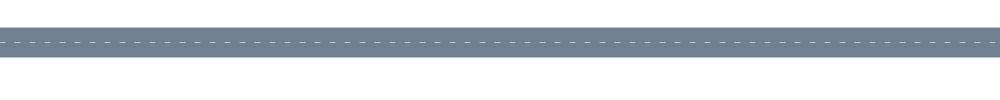

In [29]:
camera = StaticCamera(position=VecE2(100,0.0), zoom=5, canvas_height=100)
snapshot = render([roadway], camera=camera)

In [30]:
for (i, r) in odp.data.roads
    println("id: ", i)
    println("road: ", r)
    println("length: ", r.length)
    laneIds = Set()
    for off in r.lanes.laneOffset
        println("offset ", off)
    end
    for sect in r.lanes.laneSection
        println("sect s ", sect.s)
        for (id, lane) in sect.left
            println("left ", id, " ", lane)
            push!(laneIds, id)
        end
        for (id, lane) in sect.center
            println("mid ", id, " ", lane)
            push!(laneIds, id)
        end
        for (id, lane) in sect.right
            println("right ", id, " ", lane)
            push!(laneIds, id)
        end
    end
    println(laneIds)
    numLanes = length(laneIds)
    println(numLanes)
    global simple = gen_straight_roadway(numLanes, r.length)
end

id: 1
road: PyObject <src.open_drive_roadways.Road object at 0x141108710>
length: 50.0
sect s 0.0
left 1 PyObject <src.open_drive_roadways.Lane object at 0x141108e48>
mid 0 PyObject <src.open_drive_roadways.Lane object at 0x1410fd160>
right -1 PyObject <src.open_drive_roadways.Lane object at 0x1410fd7f0>
Set(Any[0, -1, 1])
3


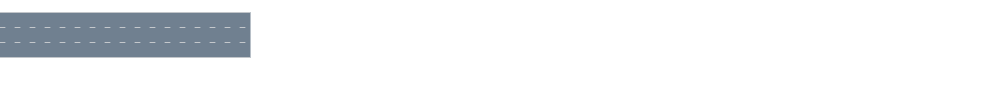

In [31]:
camera = StaticCamera(position=VecE2(100.0,0.0), zoom=5, canvas_height=100)
snapshot = render([simple], camera=camera)

In [109]:
# array 1-indexing, gen_straight_segment
# TODO: sort roads and lanes by predecessor/successor
rw = Roadway()
for (i, r) in odp.data.roads
    roadseg = RoadSegment{Float64}(i)
    println(length(roadseg.lanes))
    println("id: ", i)
    println("road: ", r)
    println("length: ", r.length)
    println("geo: ", r.planView[1].type_name == "line")
    laneIds = Set()
    origin = VecSE2(0.0,0.0,0.0)
    for sect in r.lanes.laneSection
        println("sect s ", sect.s)
        centerWidth = sect.center[0].roadMark.width
        laneindex = length(roadseg.lanes)
        y = 0
        for (id, lane) in sect.right
            if lane.type == "driving"
                println("right ", id, " ", lane)
                println("width: ", lane.width.a)
                push!(laneIds, id)
                tag = LaneTag(id,laneindex+1)
                laneindex += 1
                curve = nothing
                    if r.planView[1].type_name == "line"
                        curve = gen_straight_curve(VecE2(0.0, y), VecE2(r.length, y), 10)
                    end
                y += lane.width.a
                push!(roadseg.lanes, Lane(tag, curve, width=lane.width.a))
            end
        end
        for (id, lane) in sect.left
            if lane.type == "driving"
                println("left ", id, " ", lane)
                println("width: ", lane.width.a)
                push!(laneIds, id)
                tag = LaneTag(id,laneindex+1)
                laneindex += 1
                curve = nothing
                if r.planView[1].type_name == "line"
                    curve = gen_straight_curve(VecE2(0.0, y), VecE2(r.length, y), 10)
                elseif r.planView[1].type_name == "arc"
                    curvature = r.planView[1].type.curvature
                    curve = gen_bezier_curve(VecSE2(0.0, y), VecSE2(r.length, y), rA::T, rB::T, 10)
                end
                curve = gen_straight_curve(VecE2(0.0, y), VecE2(r.length, y), 10)
                y += lane.width.a
                push!(roadseg.lanes, Lane(tag, curve, width=lane.width.a))
            end
        end
        println(roadseg.lanes)
    println("laneindex: ", laneindex)
    println(laneIds)
    numLanes = length(laneIds)
    push!(rw.segments, roadseg)
    end
end

0
id: 1
road: PyObject <src.open_drive_roadways.Road object at 0x1410eff60>
length: 50.0
geo: true
sect s 0.0
right -1 PyObject <src.open_drive_roadways.Lane object at 0x1410fdba8>
width: 3.25
left 1 PyObject <src.open_drive_roadways.Lane object at 0x14110e390>
width: 3.25
Lane{Float64}[Lane{Float64}(LaneTag(-1, 1), CurvePt{Float64}[CurvePt({0.000, 0.000, 0.000}, 0.000, 0.000, NaN), CurvePt({5.556, 0.000, 0.000}, 5.556, 0.000, NaN), CurvePt({11.111, 0.000, 0.000}, 11.111, 0.000, NaN), CurvePt({16.667, 0.000, 0.000}, 16.667, 0.000, NaN), CurvePt({22.222, 0.000, 0.000}, 22.222, 0.000, NaN), CurvePt({27.778, 0.000, 0.000}, 27.778, 0.000, NaN), CurvePt({33.333, 0.000, 0.000}, 33.333, 0.000, NaN), CurvePt({38.889, 0.000, 0.000}, 38.889, 0.000, NaN), CurvePt({44.444, 0.000, 0.000}, 44.444, 0.000, NaN), CurvePt({50.000, 0.000, 0.000}, 50.000, 0.000, NaN)], 3.25, SpeedLimit(-Inf, Inf), LaneBoundary(:unknown, :unknown), LaneBoundary(:unknown, :unknown), LaneConnection{Int64,Float64}[], LaneConn

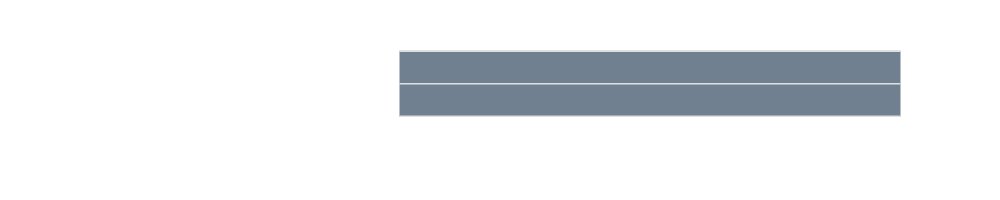

In [110]:
camera = StaticCamera(position=VecE2(10.0,0.0), zoom=10, canvas_height=200)
snapshot = render([rw], camera=camera)